# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [5]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [6]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

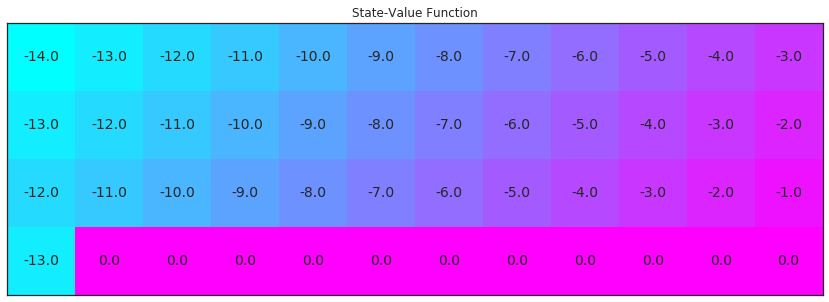

In [4]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [25]:
env.step(2)

(47, -1, True, {'prob': 1.0})

In [8]:
Q = defaultdict(lambda: np.zeros(2))
episode = generate_episode_from_epsilon_greedy(env,Q, 0.5, 2)
states, actions, rewards, done = zip(*episode)
rewards

(-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -100,
 -1,
 -1,
 -1,
 -1,
 -1,
 -100,
 -1,
 -1,
 -100,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -100,
 -1,
 -1,
 -1,
 -1,
 -100,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -100,
 -1,
 -1,
 -100,
 -1,
 -100,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,

In [10]:
episode

[(36, 0, -1, False),
 (24, 3, -1, False),
 (24, 1, -1, False),
 (25, 0, -1, False),
 (13, 3, -1, False),
 (12, 3, -1, False),
 (12, 3, -1, False),
 (12, 3, -1, False),
 (12, 1, -1, False),
 (13, 3, -1, False),
 (12, 1, -1, False),
 (13, 2, -1, False),
 (25, 0, -1, False),
 (13, 3, -1, False),
 (12, 2, -1, False),
 (24, 0, -1, False),
 (12, 0, -1, False),
 (0, 0, -1, False),
 (0, 2, -1, False),
 (12, 1, -1, False),
 (13, 2, -1, False),
 (25, 3, -1, False),
 (24, 3, -1, False),
 (24, 2, -1, False),
 (36, 0, -1, False),
 (24, 1, -1, False),
 (25, 1, -1, False),
 (26, 1, -1, False),
 (27, 1, -1, False),
 (28, 0, -1, False),
 (16, 1, -1, False),
 (17, 0, -1, False),
 (5, 3, -1, False),
 (4, 0, -1, False),
 (4, 3, -1, False),
 (3, 1, -1, False),
 (4, 2, -1, False),
 (16, 3, -1, False),
 (15, 3, -1, False),
 (14, 0, -1, False),
 (2, 2, -1, False),
 (14, 3, -1, False),
 (13, 0, -1, False),
 (1, 1, -1, False),
 (2, 3, -1, False),
 (1, 1, -1, False),
 (2, 3, -1, False),
 (1, 3, -1, False),
 (0, 

In [4]:
def action_from_epsilon_greedy(state, Q_s, epsilon, nA):
    probs = update_probs(state, Q_s, epsilon, nA)#Q_s needs to be replaced by Q[s]
    if state in Q_s:
        action = np.random.choice(np.arange(nA), p=probs)  
    else:
        action = env.action_space.sample()
    return action

In [5]:
def update_probs(state, Q_s, epsilon, nA):
    probs = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s[state])
    probs[best_a] = 1 - epsilon + epsilon / nA
    return probs

In [6]:
def update_policy(Q):
    policy = dict((k,np.argmax(v)) for k, v in Q.items())
    return policy

In [7]:
def sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    tmp_scores = deque(maxlen=100)     # deque for keeping track of scores
    avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
            avg_scores.append(np.mean(tmp_scores))
            #print(score)
        ## TODO: complete the function
        
        score = 0
        #episode = generate_episode_from_epsilon_greedy(env,Q, 0.5, nA)
        #states, actions, rewards, done = zip(*episode)
        state = env.reset()
        epsilon = 1.0 / i_episode
        action = action_from_epsilon_greedy(state, Q, epsilon, nA)
        while True:
            next_state, reward, done, info = env.step(action)
            score += reward 
            #print(rewards)
            #we can make the alpha decrease from .9 to .1 based on num_episode
            #the reward discount is not considered, to add
            if not done:
                Q_old = Q[state][action]
                next_action = action_from_epsilon_greedy(next_state,Q, epsilon, nA)
                Q[state][action] = Q_old + alpha * (reward + Q[next_state][next_action] - Q_old)
                state = next_state     # S <- S'
                action = next_action   # A <- A'    
            if done:
                Q[state][action] = Q_old + alpha * (reward - Q_old)
                tmp_scores.append(score)
                break

    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % 100)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % 100), np.max(avg_scores))       
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 100000/100000

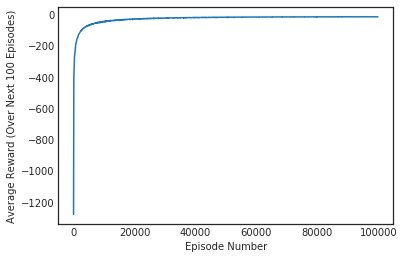

Best Average Reward over 100 Episodes:  -13.1


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  3  3  1  1  1  1  0  2  1  0  3]
 [ 0  1  1  3  0  1  2  1  1  2  3  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


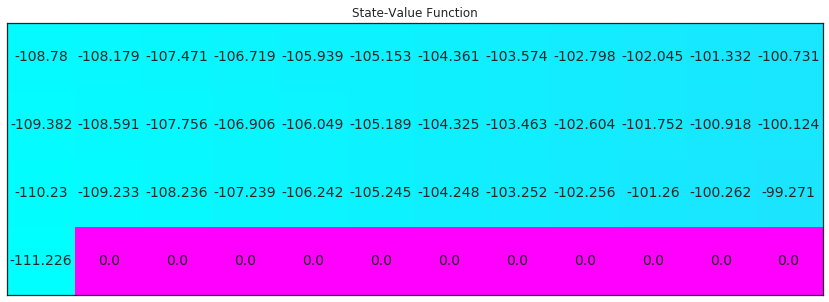

In [10]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 100000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)    

In [1]:
def action_from_epsilon_greedy(state, Q_s, epsilon, nA):
    probs = update_probs(state, Q_s, epsilon, nA)#Q_s needs to be replaced by Q[s]
    if state in Q_s:
        action = np.random.choice(np.arange(nA), p=probs)  
    else:
        action = env.action_space.sample()
    return action

In [8]:
def update_probs(state, Q_s, epsilon, nA):
    probs = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s[state])
    probs[best_a] = 1 - epsilon + epsilon / nA
    return probs

In [30]:
def q_learning(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(env.nA))
    # loop over episodes
    tmp_scores = deque(maxlen=100)     # deque for keeping track of scores
    avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
            avg_scores.append(np.mean(tmp_scores))
            #print(score)
        ## TODO: complete the function
        
        score = 0
        #episode = generate_episode_from_epsilon_greedy(env,Q, 0.5, nA)
        #states, actions, rewards, done = zip(*episode)
        state = env.reset()
        epsilon = 1.0 / i_episode
        
        while True:
            action = action_from_epsilon_greedy(state, Q, epsilon, nA)
            next_state, reward, done, info = env.step(action)
            score += reward 
            #print(rewards)
            #we can make the alpha decrease from .9 to .1 based on num_episode
            #the reward discount is not considered, to add
            if not done:
                Q_old = Q[state][action]
                best_action = np.argmax(Q[state]) #find the best next action given the current state
                Q[state][action] = Q_old + alpha * (reward + Q[next_state][best_action] - Q_old)
                state = next_state     # S <- S'
                   
            if done:
                Q[state][action] = Q_old + alpha * (reward - Q_old)
                tmp_scores.append(score)
                break

    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % 100)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % 100), np.max(avg_scores))       
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 30000/30000

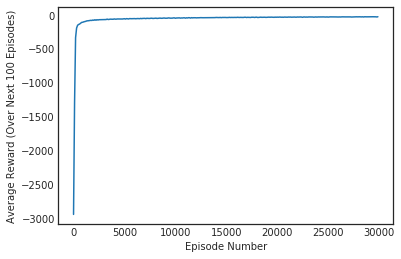

Best Average Reward over 100 Episodes:  -21.08


**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  0  1  1  1  1  1  0  1  1  1  2]
 [ 0  1  1  1  1  0  0  1  1  1  1  2]
 [ 0  1  1  0  1  1  0  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


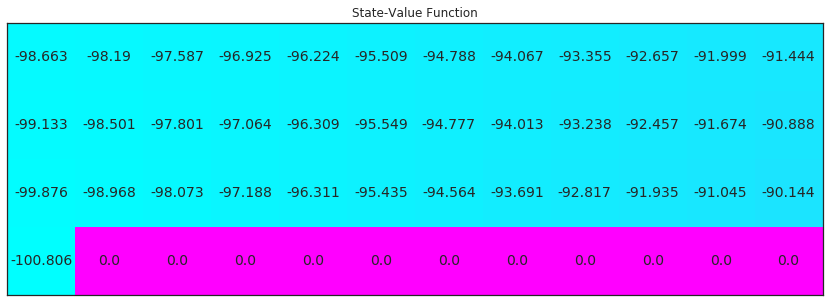

In [33]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 30000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [ ]:
def action_from_epsilon_greedy(state, Q_s, epsilon, nA):
    probs = update_probs(state, Q_s, epsilon, nA)#Q_s needs to be replaced by Q[s]
    if state in Q_s:
        action = np.random.choice(np.arange(nA), p=probs)  
    else:
        action = env.action_space.sample()
    return action

In [ ]:
def update_probs(state, Q_s, epsilon, nA):
    probs = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s[state])
    probs[best_a] = 1 - epsilon + epsilon / nA
    return probs

In [48]:
def zigma_Q(state, Q, probs):
    return sum(probs[action] * Q[state][action] for action in [0,1,2,3])

In [49]:
[0,1,2,3]

[0, 1, 2, 3]

In [56]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    tmp_scores = deque(maxlen=100)     # deque for keeping track of scores
    avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
            avg_scores.append(np.mean(tmp_scores))
            #print(score)
        ## TODO: complete the function
        
        score = 0
        #episode = generate_episode_from_epsilon_greedy(env,Q, 0.5, nA)
        #states, actions, rewards, done = zip(*episode)
        state = env.reset()
        epsilon = 0.005 #1.0 / i_episode
        
        while True:
            action = action_from_epsilon_greedy(state, Q, epsilon, nA)
            next_state, reward, done, info = env.step(action)
            score += reward 
            #print(rewards)
            #we can make the alpha decrease from .9 to .1 based on num_episode
            #the reward discount is not considered, to add
            if not done:
                Q_old = Q[state][action]
                probs = update_probs(next_state,Q, epsilon, nA)
                Q[state][action] = Q_old + alpha * (reward + zigma_Q(next_state, Q, probs) - Q_old)
                state = next_state     # S <- S'
                
            if done:
                Q[state][action] = Q_old + alpha * (reward - Q_old)
                tmp_scores.append(score)
                break

    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % 100)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % 100), np.max(avg_scores))       
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 10000/10000

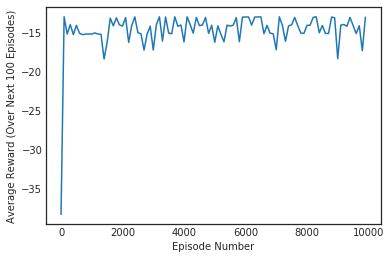

Best Average Reward over 100 Episodes:  -13.01


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  2  2  1  3  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


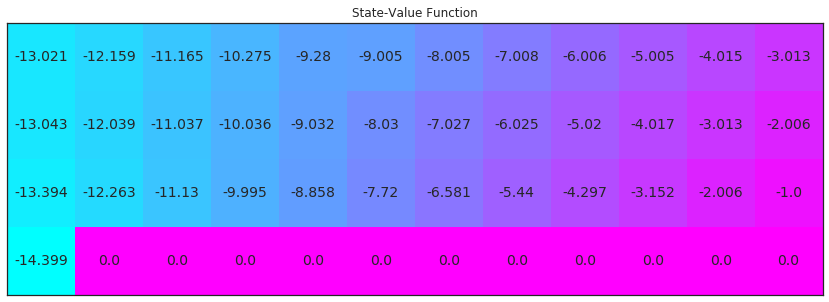

In [57]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 10000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])

In [1]:
import gym
import numpy as np

env = gym.make('Taxi-v2')
actions = list(range(6))

In [2]:
env.reset()
env.step(actions[np.random.choice(6)])

(449, -1, False, {'prob': 1.0})

In [78]:
np.random.choice(6)

0

In [82]:
actions

[0, 1, 2, 3, 4, 5]